# Import TF and others

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

# Read fire_theft file and process 

In [38]:
# X = fires per 1000 housing units
# Y = thefts per 1000 pupulation
# Downloaded from http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr05.xls
DATA_FILE = "fire_theft.xls"
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])

# Count excluding header

In [39]:
n_samples = sheet.nrows - 1
print(n_samples)

42


# Peek the data 

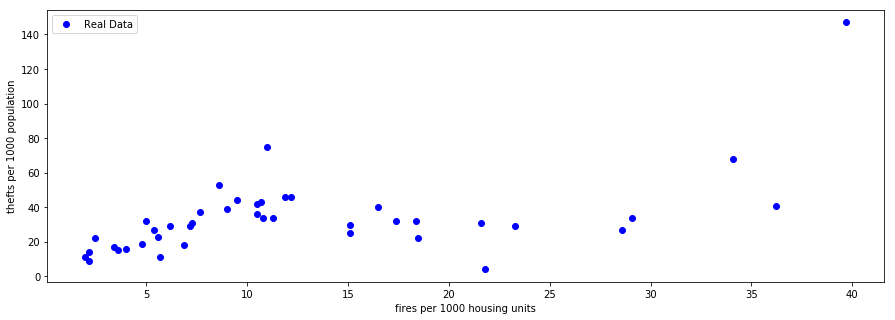

In [40]:
x, y = data.T[0], data.T[1]
plt.figure(figsize=(15, 5))
plt.plot(x, y, 'bo', label='Real Data')
plt.legend()
plt.xlabel('fires per 1000 housing units')
plt.ylabel('thefts per 1000 population')
plt.show()

In [41]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

## Think about linear relation: Theft_predict = w * Fire + bias 

In [42]:
w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")
Y_predicted = X*w + b

## Define the critical lost function 

In [43]:
# absolute error
# loss = tf.abs(Y - Y_predicted, name="loss")
# squared error
loss = tf.square(Y - Y_predicted, name="loss") 

## Optimize, start with gradient descent 

In [44]:
# try to play with different learning rate
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.0001).minimize(loss)

## Now let's train it 

In [48]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('linear_regression_001', sess.graph)
    for i in range(1000): 
        total_loss = 0
        for x, y in data:
            # Session runs train_op to minimize loss
            _, current_loss = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += current_loss
        
        if (i > 0 and i % 20 == 0):
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
    print("Training completed.")
    w_value, b_value = sess.run([w, b])
    print("After Training:\ntheft_predit = %s * fire + %s" % (w_value, b_value))
    writer.close()

Training completed.
After Training:
theft_predit = 1.29979 * fire + 15.8439


## Visualize the prediction! 

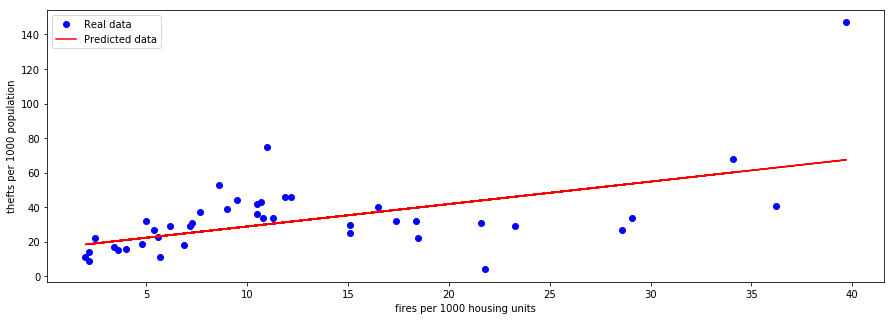

In [47]:
x, y = data.T[0], data.T[1]
plt.figure(figsize=(15,5))
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, x * w_value + b_value, 'r', label='Predicted data')
plt.xlabel("fires per 1000 housing units")
plt.ylabel("thefts per 1000 population")
plt.legend()
plt.show()